#CDR DATASET


###Introduction
The Mobile phone activity dataset is composed by one week of Call Details Records (CDRs).

###Description of the dataset
Every time a user engages a telecommunication interaction, a Radio Base Station (RBS) is assigned by the operator and delivers the communication through the network. Then, a new CDR is created recording the time of the interaction and the RBS which handled it.

The following activities are present in the dataset:

- received SMS
- sent SMS
- incoming calls
- outgoing calls
- Internet activity: In particular, Internet activity is generated each time a user starts an Internet connection or ends an Internet connection.

Moreover, during the same connection a CDR is generated if the connection lasts for more than 15 min or the user transferred more than 5 MB.


The datasets is spatially aggregated in a square cells grid. The area is composed of a grid overlay of 1,000 (squares with size of about 235×235 meters.

This grid is projected with the WGS84 (EPSG:4326) standard. For more details, check out the original paper http://go.nature.com/2fcOX5E

The data provides CellID, CountryCode and all the aforementioned telecommunication activities aggregated every 60 minutes.


Learn More about: https://www.kaggle.com/datasets/marcodena/mobile-phone-activity

# Importing Dataset

- We are getting the dataset from Kaggle: https://www.kaggle.com/datasets/marcodena/mobile-phone-activity

### This is how you mount you kaggle to google colab

In [2]:
# See My Medium Notebook for guidance:

#Method 2
import json
!pip install -q kaggle

# Step 2: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 3: Upload kaggle.json (contains your API credentials)
from google.colab import files
files.upload()  # Upload kaggle.json manually

# Step 4: Move kaggle.json to the correct location in you drive
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions list

Mounted at /content/drive


Saving kaggle.json to kaggle.json
ref                                                                                 deadline             category                reward  teamCount  userHasEntered  
----------------------------------------------------------------------------------  -------------------  ---------------  -------------  ---------  --------------  
https://www.kaggle.com/competitions/ai-mathematical-olympiad-progress-prize-3       2026-04-15 23:59:00  Featured         2,207,152 Usd       1813           False  
https://www.kaggle.com/competitions/vesuvius-challenge-surface-detection            2026-02-13 23:59:00  Research           200,000 Usd       1151           False  
https://www.kaggle.com/competitions/med-gemma-impact-challenge                      2026-02-24 23:59:00  Featured           100,000 Usd         96           False  
https://www.kaggle.com/competitions/stanford-rna-3d-folding-2                       2026-03-25 23:59:00  Featured            75,000 Usd      

In [3]:
#Method 1(better mosre secured)

from google.colab import userdata
import os

# Store your credentials in Colab Secrets first (see below)
os.environ['KAGGLE_USERNAME'] = userdata.get('KAGGLE_USERNAME')
os.environ['KAGGLE_KEY'] = userdata.get('KAGGLE_KEY')

!kaggle datasets download -d marcodena/mobile-phone-activity #marcodena/mobile-phone-activity
!unzip mobile-phone-activity.zip


Dataset URL: https://www.kaggle.com/datasets/marcodena/mobile-phone-activity
License(s): DbCL-1.0
 81% 195M/242M [00:00<00:00, 369MB/s]  
100% 242M/242M [00:00<00:00, 449MB/s]
Archive:  mobile-phone-activity.zip
  inflating: ISTAT_census_variables_2011.csv  
  inflating: Italian_provinces.geojson  
  inflating: mi-to-provinces-2013-11-01.csv  
  inflating: mi-to-provinces-2013-11-02.csv  
  inflating: mi-to-provinces-2013-11-03.csv  
  inflating: mi-to-provinces-2013-11-04.csv  
  inflating: mi-to-provinces-2013-11-05.csv  
  inflating: mi-to-provinces-2013-11-06.csv  
  inflating: mi-to-provinces-2013-11-07.csv  
  inflating: milano-grid.geojson     
  inflating: sms-call-internet-mi-2013-11-01.csv  
  inflating: sms-call-internet-mi-2013-11-02.csv  
  inflating: sms-call-internet-mi-2013-11-03.csv  
  inflating: sms-call-internet-mi-2013-11-04.csv  
  inflating: sms-call-internet-mi-2013-11-05.csv  
  inflating: sms-call-internet-mi-2013-11-06.csv  
  inflating: sms-call-internet-mi-

##libraries

In [4]:
import pandas as pd
import numpy as np
import os

#Assignment 1

##Assignment Overview

Total Points: 100

Duration: 2 weeks (Tuesday Jan 20th, 6 am  - Wednesday Feb 04rd,6am)

Deliverables:

  - Jupyter notebook (.ipynb) or Module(.py) with answers and visualizations
  - README explaining your approach(2 pages)
    - Overview of your approach
    - Key decisions you made (e.g., how you handled missing values)
    - Summary of key findings
  - All submissions should be hosted on your github account.(submit the link to the repo alongside your homework)


###TASK 1: Load and Merge data

1. Load 3 SMS/call/internet activity data (sms-call-internet-mi-2013-11-02.csv,
sms-call-internet-mi-2013-11-04.csv, sms-call-internet-mi-2013-11-06.csv) and combine them.

2. Create a clean, analysis-ready dataset.

####Requirements:
- Load all 3 activity files
- Add date and time columns
- Combine into single dataframe
- Handle any missing values (Hint: Fill with mean)
- Add aggregate columns (total_sms, total_calls, total_internet)

####Questions (50 points):
- How many total records across all 3 datasets? (10)
- How many unique grid squares (CellID) are there? (5)
- How many unique country codes appear in the data? (5)
- Are there any missing values?
  - If yes, input missing/NaN with the mean of each columns. (10)
  - For which columns are missing values most common? (5)
  - How many records did you modify? (5)

- What is the most common peak hour across all grids? (5)
  - What hour has the lowest activity? (5)
  - Calculate and report: mean, median, std, min, max for total calls by hour (15)

- What percentage of total activity happens during daytime (6am-8pm) vs nighttime(8 pm -6 am)? (5)


- Do international calls happen at different times than domestic? (compare hourly patterns) (5)

- Use numpy to perform statistical comparisons between different conditions. (5)

  Compare:
    1. Domestic (Italy) vs International calls.
        - What percentage of calls are international vs domestic? (5)
        - What percentage of SMS are international vs domestic? (5)
        - Are international calls more incoming or outgoing (calculate the ratio) (5)
    2. Different activity types.
        - Is there a correlation between SMS volume and Call volume at the grid level? (5)

In [5]:
print("LOAD AND MERGE DATA")
#Load the 3 datasets
df1 = pd.read_csv('sms-call-internet-mi-2013-11-02.csv')
df2 = pd.read_csv('sms-call-internet-mi-2013-11-04.csv')
df3 = pd.read_csv('sms-call-internet-mi-2013-11-06.csv')

print(f"Loaded: sms-call-internet-mi-2013-11-02.csv ({len(df1):,} records)")
print(f"Loaded: sms-call-internet-mi-2013-11-04.csv ({len(df2):,} records)")
print(f"Loaded: sms-call-internet-mi-2013-11-06.csv ({len(df3):,} records)")

#Combine into single dataframe
df = pd.concat([df1, df2, df3], ignore_index=True)
print(f"Combined dataset: {len(df):,} total records")

#Add date and time columns
df['datetime'] = pd.to_datetime(df['datetime'])
df['date'] = df['datetime'].dt.date
df['time'] = df['datetime'].dt.time
df['hour'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.day_name()
df['day'] = df['datetime'].dt.day
print("Added columns for date and time in details")

#Handle missing values (fill with mean)
missing_before = df.isnull().sum()
numeric_cols = ['smsin', 'smsout', 'callin', 'callout', 'internet']

if missing_before.sum() > 0:
    print("Missing values found:")
    for col in numeric_cols:
        if df[col].isnull().sum() > 0:
            missing_count = df[col].isnull().sum()
            col_mean = df[col].mean()
            print(f"  - {col}: {missing_count:,} missing values")
            df[col] = df[col].fillna(col_mean)
            print(f"    Filled with mean: {col_mean:.4f}")
else:
    print("No missing values found")

#Add aggregate columns
df['total_sms'] = df['smsin'] + df['smsout']
df['total_calls'] = df['callin'] + df['callout']
df['total_internet'] = df['internet']
df['total_activity'] = df['total_sms'] + df['total_calls'] + df['total_internet']
print("Added columns: total_sms, total_calls, total_internet, total_activity")

#Verify dataset is clean
print("\nVerifying if the dataset is clean")
print(f"Final shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"Missing values: {df.isnull().sum().sum()} (should be 0)")
print(f"Date range: {df['date'].min()} to {df['date'].max()}")
print(f"Time range: {df['hour'].min():02d}:00 to {df['hour'].max():02d}:00")

#Display dataset info
print("CLEAN DATASET SUMMARY")
print(f"Total records: {len(df):,}")
print(f"Total columns: {len(df.columns)}")
print(f"\nColumn names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

print(f"\nData types:")
print(df.dtypes)

print(f"\nSample of cleaned data:")
print(df.head())

LOAD AND MERGE DATA
Loaded: sms-call-internet-mi-2013-11-02.csv (1,847,331 records)
Loaded: sms-call-internet-mi-2013-11-04.csv (2,299,544 records)
Loaded: sms-call-internet-mi-2013-11-06.csv (2,417,156 records)
Combined dataset: 6,564,031 total records
Added columns for date and time in details
Missing values found:
  - smsin: 3,964,171 missing values
    Filled with mean: 7.8620
  - smsout: 5,025,738 missing values
    Filled with mean: 7.4408
  - callin: 4,761,685 missing values
    Filled with mean: 7.7386
  - callout: 3,764,484 missing values
    Filled with mean: 5.6867
  - internet: 3,621,117 missing values
    Filled with mean: 101.9762
Added columns: total_sms, total_calls, total_internet, total_activity

Verifying if the dataset is clean
Final shape: 6,564,031 rows × 17 columns
Missing values: 0 (should be 0)
Date range: 2013-11-02 to 2013-11-06
Time range: 00:00 to 23:00
CLEAN DATASET SUMMARY
Total records: 6,564,031
Total columns: 17

Column names:
 1. datetime
 2. CellID
 

In [6]:
total_records = len(df)
print(f"Total records across all 3 datasets: {total_records:,} total records")

#Each by dataset
print(f"Dataset 1 (Nov 2): {len(df1):,} records")
print(f"Dataset 2 (Nov 4): {len(df2):,} records")
print(f"Dataset 3 (Nov 6): {len(df3):,} records")
print(f"Combined total: {len(df1)+len(df2)+len(df3):,} records")

Total records across all 3 datasets: 6,564,031 total records
Dataset 1 (Nov 2): 1,847,331 records
Dataset 2 (Nov 4): 2,299,544 records
Dataset 3 (Nov 6): 2,417,156 records
Combined total: 6,564,031 records


In [7]:
unique_cellids = df['CellID'].nunique()
print(f"Unique grid squares (CellID): {unique_cellids} unique grid squares (CellID)")

# Show some statistics
print(f"\nCellID Statistics:")
print(f"Minimum CellID: {df['CellID'].min()}")
print(f"Maximum CellID: {df['CellID'].max()}")
print(f"Average CellID: {df['CellID'].mean():.1f}")

Unique grid squares (CellID): 10000 unique grid squares (CellID)

CellID Statistics:
Minimum CellID: 1
Maximum CellID: 10000
Average CellID: 5311.9


In [8]:
unique_countries = df['countrycode'].nunique()
print(f"Unique country codes: {unique_countries} unique country codes")

# Show some statistics
print(f"\nCountry Code Statistics:")
print(f"Minimum country code: {df['countrycode'].min()}")
print(f"Maximum country code: {df['countrycode'].max()}")
print(f"Average country code: {df['countrycode'].mean():.1f}")

Unique country codes: 302 unique country codes

Country Code Statistics:
Minimum country code: 0
Maximum country code: 97259
Average country code: 363.2


In [9]:
# We need to check the original combined data before filling
original_combined = pd.concat([df1, df2, df3], ignore_index=True)
missing_before_total = original_combined.isnull().sum().sum()
missing_by_column = original_combined.isnull().sum()

if missing_before_total > 0:
    print(f"Are there any missing values: Yes, there are missing values")
    print(f"\nTotal missing values: {missing_before_total:,}")
    print(f"Percentage of total data: {missing_before_total/total_records*100:.2f}%")
else:
    print(f"Answer: NO, there are no missing values")
    print(f"\nTotal missing values: 0")

Are there any missing values: Yes, there are missing values

Total missing values: 21,137,195
Percentage of total data: 322.02%


In [10]:
if missing_before_total > 0:
    # Find the column with the maximum missing values
    most_missing_col = missing_by_column.idxmax()
    most_missing_count = missing_by_column.max()

    print(f"For which columns are missing values most common? '{most_missing_col}' has the most missing values")
    print(f"'{most_missing_col}': {most_missing_count:,} missing values")

    # Show all columns with missing values
    print(f"\nMissing values by column (before filling):")
    for col, count in missing_by_column[missing_by_column > 0].items():
        percentage = (count / total_records) * 100
        print(f"{col:10}: {count:>10,} missing ({percentage:>6.2f}%)")
else:
    print(f"Answer: No columns have missing values")

For which columns are missing values most common? 'smsout' has the most missing values
'smsout': 5,025,738 missing values

Missing values by column (before filling):
smsin     :  3,964,171 missing ( 60.39%)
smsout    :  5,025,738 missing ( 76.56%)
callin    :  4,761,685 missing ( 72.54%)
callout   :  3,764,484 missing ( 57.35%)
internet  :  3,621,117 missing ( 55.17%)


In [11]:
if missing_before_total > 0:
    # Count records (rows) that had ANY missing value
    records_with_missing = original_combined.isnull().any(axis=1).sum()

    print(f"How many records did you modify?: {records_with_missing:,} records were modified")

    print(f"\nDetails:")
    print(f" Total records with at least one missing value: {records_with_missing:,}")
    print(f" Percentage of total records: {records_with_missing/total_records*100:.2f}%")
    print(f" Total missing cells filled: {missing_before_total:,}")

    # Also show what we did
    print(f"\nAction taken:")
    print(" Filled missing values with column means for: smsin, smsout, callin, callout, internet")

else:
    print(f"0 records were modified (no missing values)")

How many records did you modify?: 5,880,441 records were modified

Details:
 Total records with at least one missing value: 5,880,441
 Percentage of total records: 89.59%
 Total missing cells filled: 21,137,195

Action taken:
 Filled missing values with column means for: smsin, smsout, callin, callout, internet


In [12]:
print("Current status after cleaning")

# Check current missing values
current_missing = df.isnull().sum().sum()
missing_by_col_now = df.isnull().sum()

print(f"Missing values after cleaning: {current_missing}")
if current_missing == 0:
    print("SUCCESS: All missing values have been handled")
else:
    print(f"WARNING: Still {current_missing} missing values")

print(f"\nDataset shape: {df.shape[0]:,} rows × {df.shape[1]} columns")

Current status after cleaning
Missing values after cleaning: 0
SUCCESS: All missing values have been handled

Dataset shape: 6,564,031 rows × 17 columns


The most common peak hour is 17:00
 Total activity at peak: 51,477,440.53
 Activity per hour at peak: 5,147.74 (per grid)


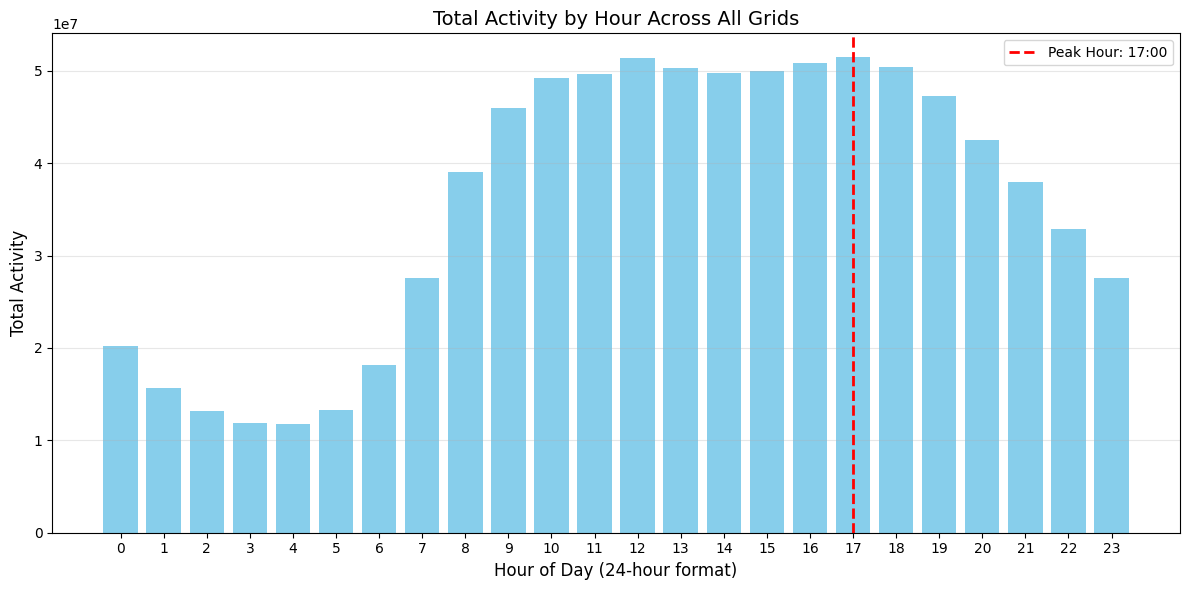


Top 3 peak hours:
1. 17:00 - 51,477,440.53 activity
2. 12:00 - 51,410,266.95 activity
3. 16:00 - 50,833,546.54 activity


In [13]:
import matplotlib.pyplot as plt

# Calculate total activity by hour across all grids
hourly_activity = df.groupby('hour')['total_activity'].sum()

# Find peak hour
peak_hour = hourly_activity.idxmax()
peak_activity = hourly_activity.max()

print(f"The most common peak hour is {peak_hour}:00")
print(f" Total activity at peak: {peak_activity:,.2f}")
print(f" Activity per hour at peak: {peak_activity/unique_cellids:,.2f} (per grid)")

# Visualize hourly activity
plt.figure(figsize=(12, 6))
plt.bar(hourly_activity.index, hourly_activity.values, color='skyblue')
plt.axvline(x=peak_hour, color='red', linestyle='--', linewidth=2, label=f'Peak Hour: {peak_hour}:00')
plt.xlabel('Hour of Day (24-hour format)', fontsize=12)
plt.ylabel('Total Activity', fontsize=12)
plt.title('Total Activity by Hour Across All Grids', fontsize=14)
plt.xticks(range(0, 24))
plt.grid(alpha=0.3, axis='y')
plt.legend()
plt.tight_layout()
plt.show()

# Show top 3 peak hours
top_3_hours = hourly_activity.sort_values(ascending=False).head(3)
print(f"\nTop 3 peak hours:")
for i, (hour, activity) in enumerate(top_3_hours.items(), 1):
    print(f"{i}. {hour}:00 - {activity:,.2f} activity")

Hour with lowest activity
The hour with the lowest activity is 4:00
 Lowest hour: 4:00
 Total activity at lowest: 11,777,007.39
 Activity per hour at lowest: 1,177.70 (per grid)
 Difference from peak: 39,700,433.14 (4.4x more at peak)


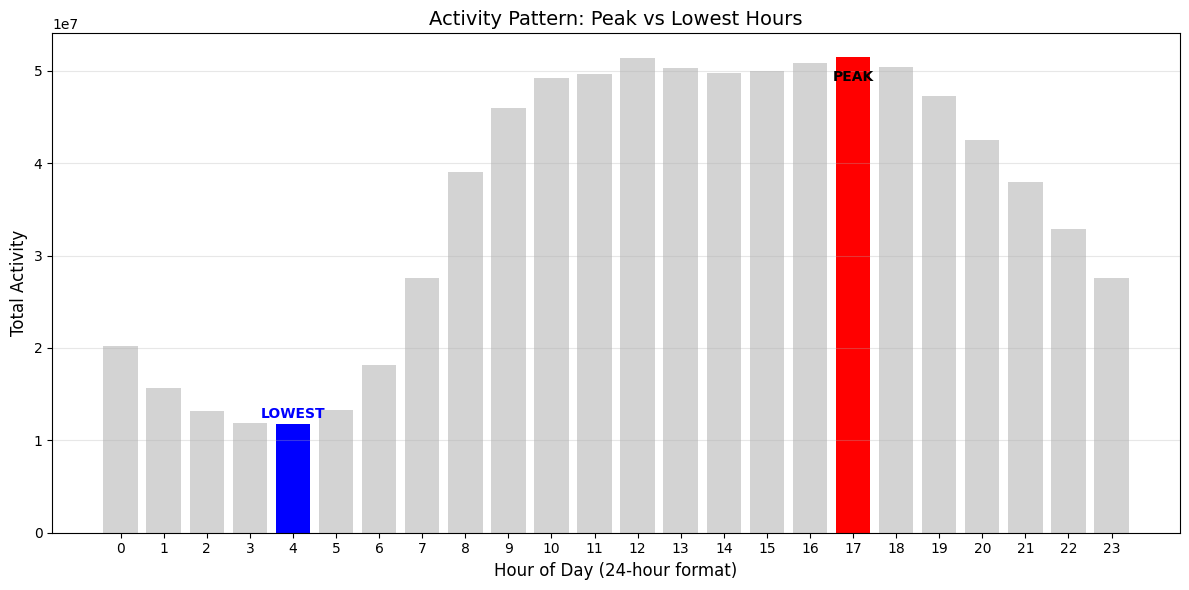


Bottom 3 hours (lowest activity):
1. 4:00 - 11,777,007.39 activity
2. 3:00 - 11,860,508.74 activity
3. 2:00 - 13,182,205.47 activity


In [14]:
#Hour with lowest activity
print("Hour with lowest activity")

#lowest activity hour
lowest_hour = hourly_activity.idxmin()
lowest_activity = hourly_activity.min()

print(f"The hour with the lowest activity is {lowest_hour}:00")
print(f" Lowest hour: {lowest_hour}:00")
print(f" Total activity at lowest: {lowest_activity:,.2f}")
print(f" Activity per hour at lowest: {lowest_activity/unique_cellids:,.2f} (per grid)")
print(f" Difference from peak: {peak_activity - lowest_activity:,.2f} ({peak_activity/lowest_activity:.1f}x more at peak)")

# Visualize with comparison
plt.figure(figsize=(12, 6))
bars = plt.bar(hourly_activity.index, hourly_activity.values,
               color=['red' if h == peak_hour else 'blue' if h == lowest_hour else 'lightgray' for h in hourly_activity.index])
plt.xlabel('Hour of Day (24-hour format)', fontsize=12)
plt.ylabel('Total Activity', fontsize=12)
plt.title('Activity Pattern: Peak vs Lowest Hours', fontsize=14)
plt.xticks(range(0, 24))

# Add annotations
plt.text(peak_hour, peak_activity * 0.95, 'PEAK', ha='center', fontweight='bold', color='black')
plt.text(lowest_hour, lowest_activity * 1.05, 'LOWEST', ha='center', fontweight='bold', color='blue')

plt.grid(alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Show bottom 3 hours
bottom_3_hours = hourly_activity.sort_values().head(3)
print(f"\nBottom 3 hours (lowest activity):")
for i, (hour, activity) in enumerate(bottom_3_hours.items(), 1):
    print(f"{i}. {hour}:00 - {activity:,.2f} activity")

In [15]:
#Statistics for total calls by hour
print("Statistics for total calls by hour")

#statistics for total calls by hour
hourly_calls_stats = df.groupby('hour')['total_calls'].agg(['mean', 'median', 'std', 'min', 'max', 'count'])

print("Statistics for total calls by hour:")
print(f"{'Hour':<6} {'Mean':<12} {'Median':<12} {'Std':<12} {'Min':<12} {'Max':<12} {'Count':<10}")

for hour in range(24):
    stats = hourly_calls_stats.loc[hour]
    print(f"{hour:<6} {stats['mean']:<12.2f} {stats['median']:<12.2f} "
          f"{stats['std']:<12.2f} {stats['min']:<12.2f} {stats['max']:<12.2f} "
          f"{stats['count']:<10,}")

#overall statistics
print("\nOVERALL CALL STATISTICS (All hours combined):")
overall_stats = df['total_calls'].agg(['mean', 'median', 'std', 'min', 'max', 'sum'])
print(f"Mean calls per record:   {overall_stats['mean']:.2f}")
print(f"Median calls per record: {overall_stats['median']:.2f}")
print(f"Std deviation:           {overall_stats['std']:.2f}")
print(f"Minimum calls:           {overall_stats['min']:.2f}")
print(f"Maximum calls:           {overall_stats['max']:.2f}")
print(f"Total calls:             {overall_stats['sum']:,.2f}")
print(f"Number of records:       {len(df):,}")

Statistics for total calls by hour
Statistics for total calls by hour:
Hour   Mean         Median       Std          Min          Max          Count     
0      10.28        13.43        5.28         0.00         223.49       150,207.0 
1      9.93         13.43        5.13         0.00         141.98       119,415.0 
2      9.89         13.43        5.33         0.00         210.97       103,908.0 
3      9.95         13.43        5.65         0.00         298.35       97,566.0  
4      10.24        13.43        5.29         0.00         255.06       107,494.0 
5      10.03        13.43        5.40         0.00         177.17       124,507.0 
6      10.34        13.43        4.97         0.00         201.35       173,260.0 
7      11.46        13.43        8.44         0.00         412.73       240,986.0 
8      13.27        13.43        22.24        0.00         1122.71      318,128.0 
9      14.51        13.43        35.50        0.00         1972.83      365,181.0 
10     14.92    

Daytime vs Nighttime activity percentage:
 Daytime (6am-8pm): 73.55% of total activity
 Nighttime (8pm-6am): 26.45% of total activity
 Daytime activity: 631,027,956.64
 Nighttime activity: 226,918,319.77
 Total activity: 857,946,276.41
 Ratio (Day:Night): 2.78:1


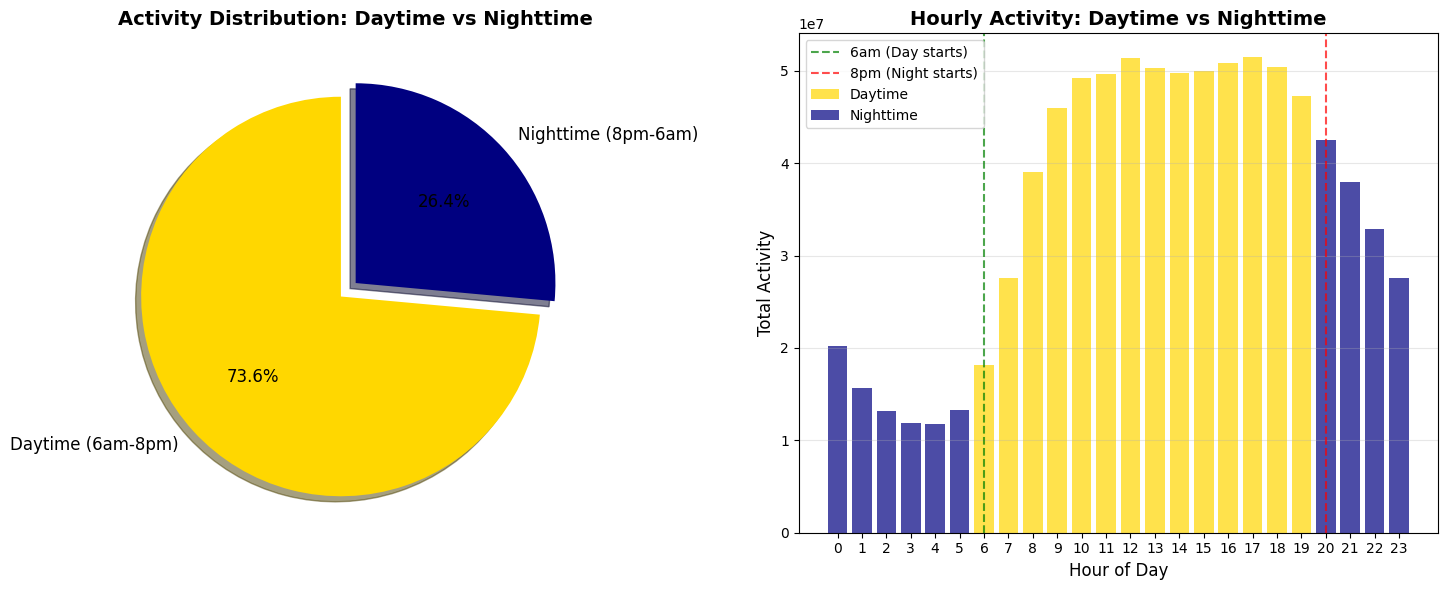


Activities by type:

Sms:
  Daytime: 77.48% (77,824,364.49)
  Nighttime: 22.52% (22,623,213.84)

Calls:
  Daytime: 78.00% (68,737,638.69)
  Nighttime: 22.00% (19,386,432.65)

Internet:
  Daytime: 72.38% (484,465,953.46)
  Nighttime: 27.62% (184,908,673.28)


In [16]:
#Daytime vs Nighttime activity percentage
print("Daytime vs Nighttime activity percentage:")

# Define daytime (6am-8pm) and nighttime (8pm-6am)
def is_daytime(hour):
    return 6 <= hour < 20  # 6am to 7:59pm

# Apply to dataset
df['is_daytime'] = df['hour'].apply(is_daytime)
df['time_period'] = df['is_daytime'].map({True: 'Daytime (6am-8pm)', False: 'Nighttime (8pm-6am)'})

# Calculate activity by time period
activity_by_period = df.groupby('time_period')['total_activity'].sum()
total_activity_all = activity_by_period.sum()

# Calculate percentages
daytime_activity = activity_by_period['Daytime (6am-8pm)']
nighttime_activity = activity_by_period['Nighttime (8pm-6am)']

daytime_pct = (daytime_activity / total_activity_all) * 100
nighttime_pct = (nighttime_activity / total_activity_all) * 100

print(f" Daytime (6am-8pm): {daytime_pct:.2f}% of total activity")
print(f" Nighttime (8pm-6am): {nighttime_pct:.2f}% of total activity")

print(f" Daytime activity: {daytime_activity:,.2f}")
print(f" Nighttime activity: {nighttime_activity:,.2f}")
print(f" Total activity: {total_activity_all:,.2f}")
print(f" Ratio (Day:Night): {daytime_pct/nighttime_pct:.2f}:1")

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Pie chart
labels = ['Daytime (6am-8pm)', 'Nighttime (8pm-6am)']
sizes = [daytime_pct, nighttime_pct]
colors = ['gold', 'navy']
explode = (0.1, 0)

ax1.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90, textprops={'fontsize': 12})
ax1.set_title('Activity Distribution: Daytime vs Nighttime', fontsize=14, fontweight='bold')

# Bar chart with hourly breakdown
daytime_hours = list(range(6, 20))
nighttime_hours = list(range(0, 6)) + list(range(20, 24))

daytime_hourly = df[df['is_daytime']].groupby('hour')['total_activity'].sum()
nighttime_hourly = df[~df['is_daytime']].groupby('hour')['total_activity'].sum()

ax2.bar(daytime_hourly.index, daytime_hourly.values, color='gold', alpha=0.7, label='Daytime', width=0.8)
ax2.bar(nighttime_hourly.index, nighttime_hourly.values, color='navy', alpha=0.7, label='Nighttime', width=0.8)
ax2.set_xlabel('Hour of Day', fontsize=12)
ax2.set_ylabel('Total Activity', fontsize=12)
ax2.set_title('Hourly Activity: Daytime vs Nighttime', fontsize=14, fontweight='bold')
ax2.set_xticks(range(0, 24))
ax2.axvline(x=6, color='green', linestyle='--', alpha=0.7, label='6am (Day starts)')
ax2.axvline(x=20, color='red', linestyle='--', alpha=0.7, label='8pm (Night starts)')
ax2.legend()
ax2.grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Additional analysis by activity type
print("\nActivities by type:")
for activity in ['total_sms', 'total_calls', 'total_internet']:
    daytime_act = df[df['is_daytime']][activity].sum()
    nighttime_act = df[~df['is_daytime']][activity].sum()
    total_act = daytime_act + nighttime_act

    daytime_pct_act = (daytime_act / total_act) * 100
    nighttime_pct_act = (nighttime_act / total_act) * 100

    activity_name = activity.replace('total_', '').title()
    print(f"\n{activity_name}:")
    print(f"  Daytime: {daytime_pct_act:.2f}% ({daytime_act:,.2f})")
    print(f"  Nighttime: {nighttime_pct_act:.2f}% ({nighttime_act:,.2f})")

Most common country code: 39 (assumed to be domestic/Italy)

Peak call hours:
 Domestic calls peak at: 17:00
 International calls peak at: 4:00

So, Yes. The international calls happen at different times than domestic
 Difference: 13 hours


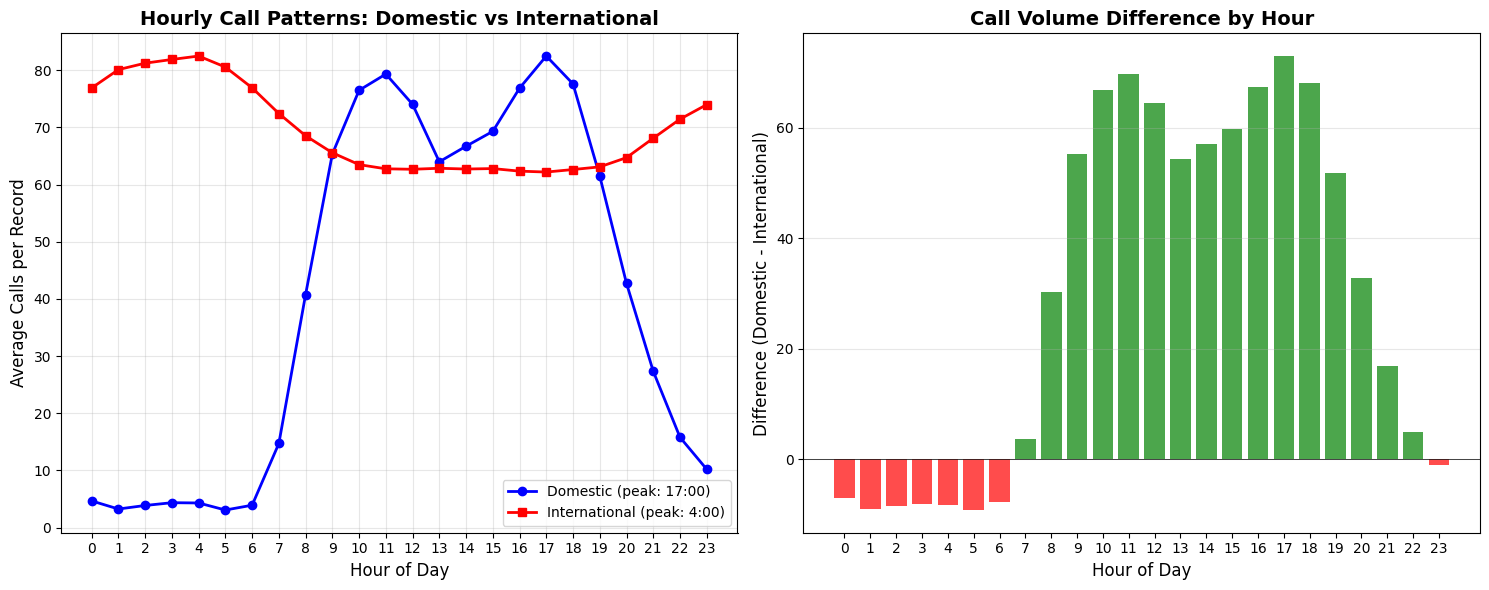


Detailed comparison:
Metric                    Domestic        International   Difference     
Mean calls/hour           40.52           10.59           29.93           (+117.2%)
Std deviation             31.79           1.16            30.64           (+186.0%)
Max calls/hour            82.47           12.53           69.94           (+147.2%)
Min calls/hour            3.08            9.45            -6.37           (-101.7%)
Total daily calls         29174229.90     58949841.43     -29775611.53    (-67.6%)


In [19]:
# Identify domestic vs international calls
# Based on the data, let's find the most common country code (likely Italy/domestic)
country_counts = df['countrycode'].value_counts()
most_common_country = country_counts.index[0]
print(f"Most common country code: {most_common_country} (assumed to be domestic/Italy)")

# Create domestic/international flag
df['is_domestic'] = df['countrycode'] == most_common_country
df['call_type'] = df['is_domestic'].map({True: 'Domestic', False: 'International'})

# Calculate hourly patterns for domestic and international calls
domestic_hourly = df[df['is_domestic']].groupby('hour')['total_calls'].mean()
international_hourly = df[~df['is_domestic']].groupby('hour')['total_calls'].mean()

# Find peak hours
domestic_peak_hour = domestic_hourly.idxmax()
international_peak_hour = international_hourly.idxmax()

print(f"\nPeak call hours:")
print(f" Domestic calls peak at: {domestic_peak_hour}:00")
print(f" International calls peak at: {international_peak_hour}:00")

if domestic_peak_hour != international_peak_hour:
    print(f"\nSo, Yes. The international calls happen at different times than domestic")
    print(f" Difference: {abs(domestic_peak_hour - international_peak_hour)} hours")
else:
    print(f"\nAnswer: NO, they peak at the same time")

# Visual comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Line plot comparison
ax1.plot(domestic_hourly.index, domestic_hourly.values, 'b-', linewidth=2, marker='o',
         label=f'Domestic (peak: {domestic_peak_hour}:00)', markersize=6)

# Scale international calls to match domestic max only for plotting
international_scaled = international_hourly * (domestic_hourly.max() / international_hourly.max())
ax1.plot(international_scaled.index, international_scaled.values, 'r-', linewidth=2, marker='s',
         label=f'International (peak: {international_peak_hour}:00)', markersize=6)

ax1.set_xlabel('Hour of Day', fontsize=12)
ax1.set_ylabel('Average Calls per Record', fontsize=12)
ax1.set_title('Hourly Call Patterns: Domestic vs International', fontsize=14, fontweight='bold')
ax1.set_xticks(range(0, 24))
ax1.legend()
ax1.grid(alpha=0.3)

# Difference plot
difference = domestic_hourly.values - international_hourly.values
colors = ['green' if diff > 0 else 'red' for diff in difference]
ax2.bar(range(24), difference, color=colors, alpha=0.7)
ax2.axhline(y=0, color='black', linewidth=0.5)
ax2.set_xlabel('Hour of Day', fontsize=12)
ax2.set_ylabel('Difference (Domestic - International)', fontsize=12)
ax2.set_title('Call Volume Difference by Hour', fontsize=14, fontweight='bold')
ax2.set_xticks(range(0, 24))
ax2.grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Additional analysis
print("\nDetailed comparison:")
print(f"{'Metric':<25} {'Domestic':<15} {'International':<15} {'Difference':<15}")

metrics = ['Mean calls/hour', 'Std deviation', 'Max calls/hour', 'Min calls/hour', 'Total daily calls']
domestic_values = [
    domestic_hourly.mean(),
    domestic_hourly.std(),
    domestic_hourly.max(),
    domestic_hourly.min(),
    df[df['is_domestic']]['total_calls'].sum()
]
international_values = [
    international_hourly.mean(),
    international_hourly.std(),
    international_hourly.max(),
    international_hourly.min(),
    df[~df['is_domestic']]['total_calls'].sum()
]

for metric, dom_val, int_val in zip(metrics, domestic_values, international_values):
    diff = dom_val - int_val
    pct_diff = (diff / ((dom_val + int_val) / 2)) * 100 if (dom_val + int_val) > 0 else 0
    print(f"{metric:<25} {dom_val:<15.2f} {int_val:<15.2f} {diff:<15.2f} ({pct_diff:+.1f}%)")

The percentage of calls for international vs domestic:
 Domestic calls: 33.11% (29,174,229.90 calls)
 International calls: 66.89% (58,949,841.43 calls)
 Total calls: 88,124,071.34

Ratio (Domestic:International): 0.49:1


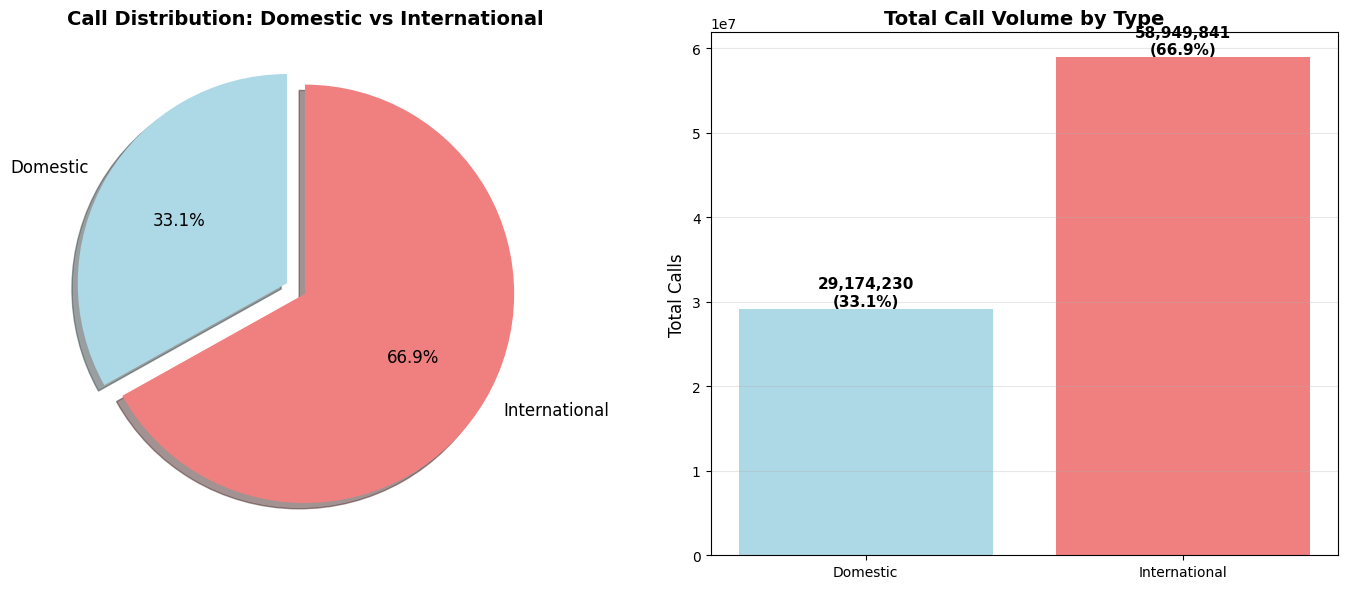


Detailed breakdown:
Call Type            Incoming        Outgoing        Total          
Domestic             13,884,633.39   15,289,596.52   29,174,229.90  
International        36,911,800.81   22,038,040.62   58,949,841.43  
Total                50,796,434.20   37,327,637.14   88,124,071.34  


In [32]:
print("The percentage of calls for international vs domestic:")

# Calculate total calls by type
domestic_total_calls = df[df['is_domestic']]['total_calls'].sum()
international_total_calls = df[~df['is_domestic']]['total_calls'].sum()
total_calls_all = domestic_total_calls + international_total_calls

# Calculate percentages
domestic_calls_pct = (domestic_total_calls / total_calls_all) * 100
international_calls_pct = (international_total_calls / total_calls_all) * 100

print(f" Domestic calls: {domestic_calls_pct:.2f}% ({domestic_total_calls:,.2f} calls)")
print(f" International calls: {international_calls_pct:.2f}% ({international_total_calls:,.2f} calls)")
print(f" Total calls: {total_calls_all:,.2f}")

print(f"\nRatio (Domestic:International): {domestic_calls_pct/international_calls_pct:.2f}:1")

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Pie chart
labels = ['Domestic', 'International']
sizes = [domestic_calls_pct, international_calls_pct]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)

ax1.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90, textprops={'fontsize': 12})
ax1.set_title('Call Distribution: Domestic vs International', fontsize=14, fontweight='bold')

# Bar chart
ax2.bar(labels, [domestic_total_calls, international_total_calls], color=colors)
ax2.set_ylabel('Total Calls', fontsize=12)
ax2.set_title('Total Call Volume by Type', fontsize=14, fontweight='bold')
ax2.grid(alpha=0.3, axis='y')

# Add value labels on bars
for i, (label, value) in enumerate(zip(labels, [domestic_total_calls, international_total_calls])):
    ax2.text(i, value, f'{value:,.0f}\n({sizes[i]:.1f}%)',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

# Breakdown by incoming vs outgoing
print("\nDetailed breakdown:")
print(f"{'Call Type':<20} {'Incoming':<15} {'Outgoing':<15} {'Total':<15}")

# Domestic calls
domestic_incoming = df[df['is_domestic']]['callin'].sum()
domestic_outgoing = df[df['is_domestic']]['callout'].sum()
print(f"{'Domestic':<20} {domestic_incoming:<15,.2f} {domestic_outgoing:<15,.2f} {domestic_total_calls:<15,.2f}")

# International calls
international_incoming = df[~df['is_domestic']]['callin'].sum()
international_outgoing = df[~df['is_domestic']]['callout'].sum()
print(f"{'International':<20} {international_incoming:<15,.2f} {international_outgoing:<15,.2f} {international_total_calls:<15,.2f}")

# Totals
total_incoming = domestic_incoming + international_incoming
total_outgoing = domestic_outgoing + international_outgoing
print(f"{'Total':<20} {total_incoming:<15,.2f} {total_outgoing:<15,.2f} {total_calls_all:<15,.2f}")

The percentage of SMS for international vs domestic:
 Domestic SMS: 24.98% (25,092,955.54 SMS)
 International SMS: 75.02% (75,354,622.80 SMS)
 Total SMS: 100,447,578.33

Ratio (Domestic:International): 0.33:1

Comparison with calls:
 Calls - Domestic: 33.11%, International: 66.89%
 SMS   - Domestic: 24.98%, International: 75.02%
 Difference in domestic percentage (calls vs SMS): 8.12%


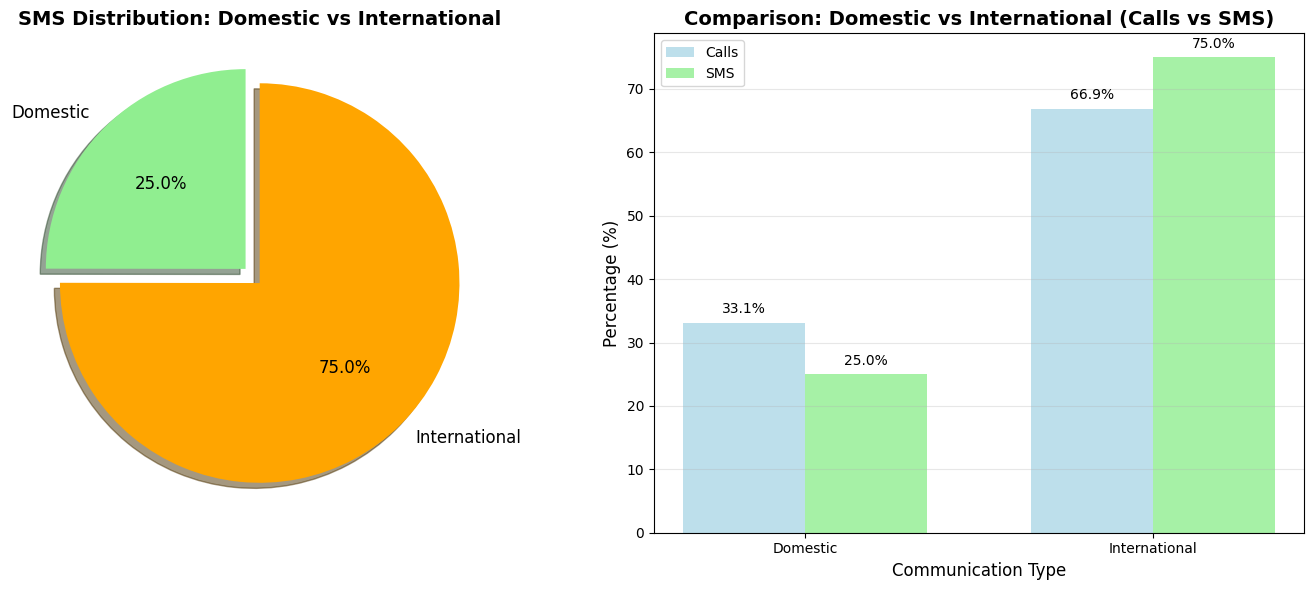


Detailed SMS breakdown:
SMS Type             Received        Sent            Total          
Domestic             14,028,870.26   11,064,085.28   25,092,955.54  
International        37,577,386.72   37,777,236.08   75,354,622.80  
Total                51,606,256.97   48,841,321.36   100,447,578.33 


In [31]:
#Percentage of SMS international vs domestic
print("The percentage of SMS for international vs domestic:")

# Calculate total SMS by type
domestic_total_sms = df[df['is_domestic']]['total_sms'].sum()
international_total_sms = df[~df['is_domestic']]['total_sms'].sum()
total_sms_all = domestic_total_sms + international_total_sms

# Calculate percentages
domestic_sms_pct = (domestic_total_sms / total_sms_all) * 100
international_sms_pct = (international_total_sms / total_sms_all) * 100

print(f" Domestic SMS: {domestic_sms_pct:.2f}% ({domestic_total_sms:,.2f} SMS)")
print(f" International SMS: {international_sms_pct:.2f}% ({international_total_sms:,.2f} SMS)")
print(f" Total SMS: {total_sms_all:,.2f}")

print(f"\nRatio (Domestic:International): {domestic_sms_pct/international_sms_pct:.2f}:1")

# Compare with calls
print(f"\nComparison with calls:")
print(f" Calls - Domestic: {domestic_calls_pct:.2f}%, International: {international_calls_pct:.2f}%")
print(f" SMS   - Domestic: {domestic_sms_pct:.2f}%, International: {international_sms_pct:.2f}%")

difference_calls_sms = abs(domestic_calls_pct - domestic_sms_pct)
print(f" Difference in domestic percentage (calls vs SMS): {difference_calls_sms:.2f}%")

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Pie chart for SMS
labels = ['Domestic', 'International']
sizes_sms = [domestic_sms_pct, international_sms_pct]
colors = ['lightgreen', 'orange']
explode = (0.1, 0)

ax1.pie(sizes_sms, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90, textprops={'fontsize': 12})
ax1.set_title('SMS Distribution: Domestic vs International', fontsize=14, fontweight='bold')

# Comparison bar chart (SMS vs Calls)
x = np.arange(len(labels))
width = 0.35

ax2.bar(x - width/2, [domestic_calls_pct, international_calls_pct], width,
        label='Calls', color='lightblue', alpha=0.8)
ax2.bar(x + width/2, [domestic_sms_pct, international_sms_pct], width,
        label='SMS', color='lightgreen', alpha=0.8)

ax2.set_xlabel('Communication Type', fontsize=12)
ax2.set_ylabel('Percentage (%)', fontsize=12)
ax2.set_title('Comparison: Domestic vs International (Calls vs SMS)', fontsize=14, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(labels)
ax2.legend()
ax2.grid(alpha=0.3, axis='y')

# Add value labels
for i in range(len(labels)):
    ax2.text(i - width/2, [domestic_calls_pct, international_calls_pct][i] + 1,
             f'{[domestic_calls_pct, international_calls_pct][i]:.1f}%',
             ha='center', va='bottom', fontsize=10)
    ax2.text(i + width/2, [domestic_sms_pct, international_sms_pct][i] + 1,
             f'{[domestic_sms_pct, international_sms_pct][i]:.1f}%',
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Breakdown by incoming vs outgoing SMS
print("\nDetailed SMS breakdown:")
print(f"{'SMS Type':<20} {'Received':<15} {'Sent':<15} {'Total':<15}")

# Domestic SMS
domestic_received = df[df['is_domestic']]['smsin'].sum()
domestic_sent = df[df['is_domestic']]['smsout'].sum()
print(f"{'Domestic':<20} {domestic_received:<15,.2f} {domestic_sent:<15,.2f} {domestic_total_sms:<15,.2f}")

# International SMS
international_received = df[~df['is_domestic']]['smsin'].sum()
international_sent = df[~df['is_domestic']]['smsout'].sum()
print(f"{'International':<20} {international_received:<15,.2f} {international_sent:<15,.2f} {international_total_sms:<15,.2f}")

# Totals
total_received = domestic_received + international_received
total_sent = domestic_sent + international_sent
print(f"{'Total':<20} {total_received:<15,.2f} {total_sent:<15,.2f} {total_sms_all:<15,.2f}")

Are international calls more incoming or outgoing?
International calls:
 Incoming calls: 36,911,800.81
 Outgoing calls: 22,038,040.62
 Incoming/Outgoing ratio: 1.67

So, Yes. International calls are MORE INCOMING
 Ratio: 1.67 (incoming is 1.7x outgoing)

Comparison with domestic calls:
 Domestic incoming/outgoing ratio: 0.91
 International incoming/outgoing ratio: 1.67
 International calls are 1.8x more incoming-heavy than domestic


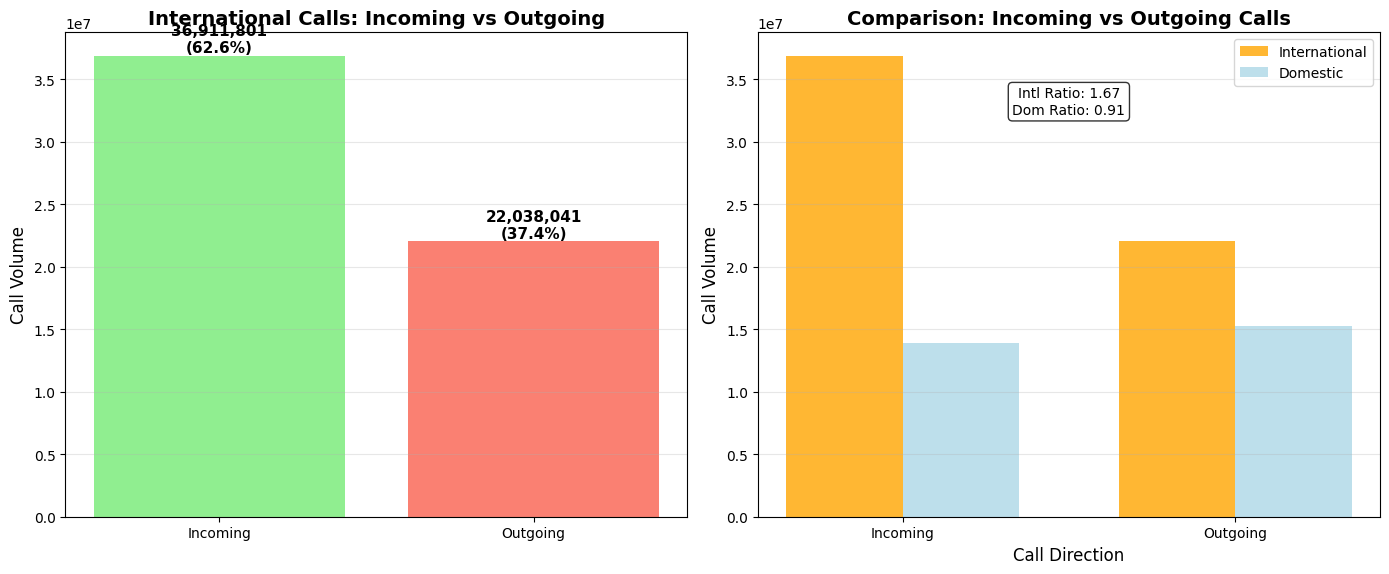

In [37]:
#International calls incoming vs outgoing ratio
print("Are international calls more incoming or outgoing?")

# Calculate international call ratio
if international_outgoing > 0:
    incoming_outgoing_ratio = international_incoming / international_outgoing
else:
    incoming_outgoing_ratio = float('inf')

print(f"International calls:")
print(f" Incoming calls: {international_incoming:,.2f}")
print(f" Outgoing calls: {international_outgoing:,.2f}")
print(f" Incoming/Outgoing ratio: {incoming_outgoing_ratio:.2f}")

# Determine answer
if incoming_outgoing_ratio > 1:
    print(f"\nSo, Yes. International calls are MORE INCOMING")
    print(f" Ratio: {incoming_outgoing_ratio:.2f} (incoming is {incoming_outgoing_ratio:.1f}x outgoing)")
elif incoming_outgoing_ratio < 1:
    print(f"\n NO, international calls are MORE OUTGOING")
    print(f" Ratio: {incoming_outgoing_ratio:.2f} (outgoing is {1/incoming_outgoing_ratio:.1f}x incoming)")
else:
    print(f"\n BALANCED; incoming equals outgoing")

# Compare with domestic calls
if domestic_outgoing > 0:
    domestic_ratio = domestic_incoming / domestic_outgoing
else:
    domestic_ratio = float('inf')

print(f"\nComparison with domestic calls:")
print(f" Domestic incoming/outgoing ratio: {domestic_ratio:.2f}")
print(f" International incoming/outgoing ratio: {incoming_outgoing_ratio:.2f}")

ratio_difference = abs(incoming_outgoing_ratio - domestic_ratio)
if incoming_outgoing_ratio > domestic_ratio:
    print(f" International calls are {incoming_outgoing_ratio/domestic_ratio:.1f}x more incoming-heavy than domestic")
else:
    print(f" International calls are {domestic_ratio/incoming_outgoing_ratio:.1f}x more outgoing-heavy than domestic")

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# International calls breakdown
int_labels = ['Incoming', 'Outgoing']
int_values = [international_incoming, international_outgoing]
int_colors = ['lightgreen', 'salmon']

ax1.bar(int_labels, int_values, color=int_colors)
ax1.set_title('International Calls: Incoming vs Outgoing', fontsize=14, fontweight='bold')
ax1.set_ylabel('Call Volume', fontsize=12)
ax1.grid(alpha=0.3, axis='y')

# Add value labels and percentage
for i, (label, value) in enumerate(zip(int_labels, int_values)):
    percentage = (value / international_total_calls) * 100
    ax1.text(i, value, f'{value:,.0f}\n({percentage:.1f}%)',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

# Comparison with domestic
dom_labels = ['Incoming', 'Outgoing']
dom_values = [domestic_incoming, domestic_outgoing]
dom_colors = ['lightgreen', 'salmon']

x = np.arange(len(dom_labels))
width = 0.35

ax2.bar(x - width/2, int_values, width, label='International', color='orange', alpha=0.8)
ax2.bar(x + width/2, dom_values, width, label='Domestic', color='lightblue', alpha=0.8)

ax2.set_xlabel('Call Direction', fontsize=12)
ax2.set_ylabel('Call Volume', fontsize=12)
ax2.set_title('Comparison: Incoming vs Outgoing Calls', fontsize=14, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(dom_labels)
ax2.legend()
ax2.grid(alpha=0.3, axis='y')

# Add ratio annotations
ax2.text(0.5, max(max(int_values), max(dom_values)) * 0.9,
         f'Intl Ratio: {incoming_outgoing_ratio:.2f}\nDom Ratio: {domestic_ratio:.2f}',
         ha='center', va='center', fontsize=10,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.tight_layout()
plt.show()

Correlation between SMS volume and Call volume at grid level
Aggregating data by grid square (CellID)
Number of grids analyzed: 10,000

Correlation coefficient = 0.9862
Interpretation: STRONG POSITIVE correlation
Meaning: Grids with high SMS volume also have high call volume

Additional correlations at grid level:
 SMS vs Internet: 0.9455
 Calls vs Internet: 0.9379

Statistical analysis (using numpy):
 95% Confidence Interval: [0.9857, 0.9868]
 R-squared: 0.9727 (97.3% of variance explained)


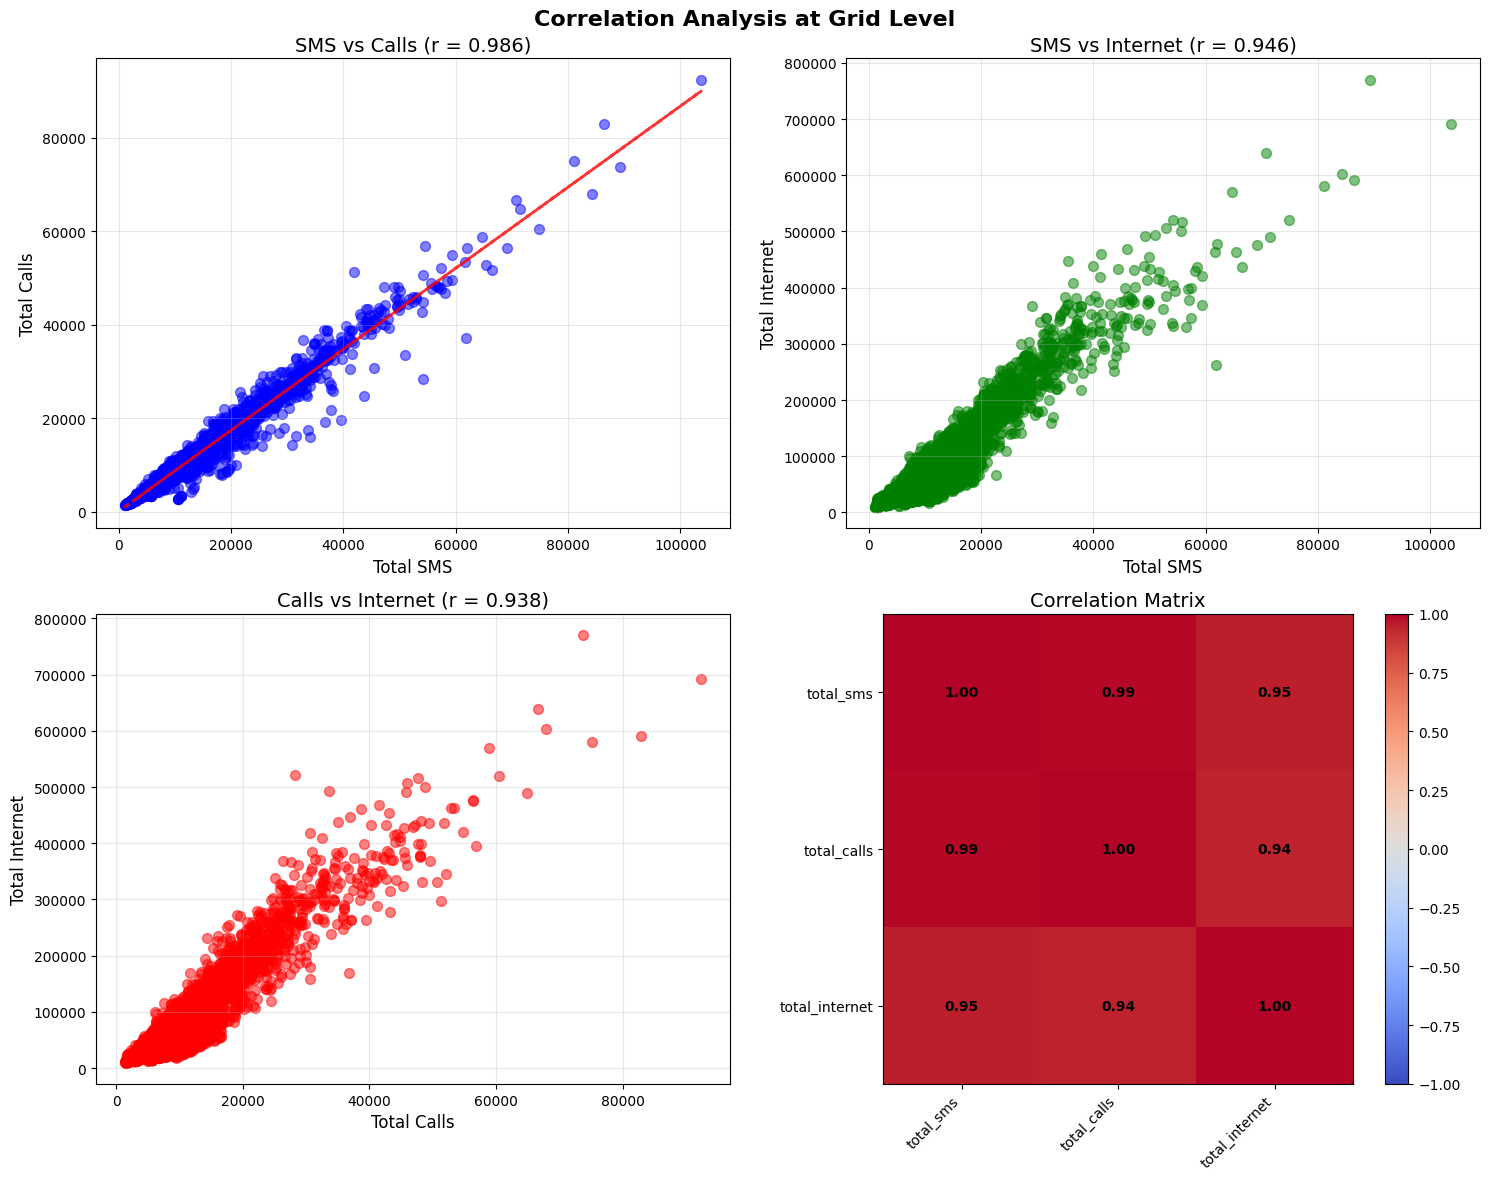


Top 5 grids by activity:
CellID     Total SMS       Total Calls     Total Internet  Total Activity 
5161.0     89,207.41       73,685.07       770,028.51      932,920.99     
5059.0     103,730.25      92,429.74       691,920.75      888,080.74     
5259.0     70,784.60       66,682.32       638,880.09      776,347.02     
6064.0     86,443.51       82,929.40       590,692.40      760,065.30     
5061.0     84,243.22       67,915.93       602,687.17      754,846.31     

Activity composition for top grids (%):

CellID 5161.0:
  SMS: 9.6%, Calls: 7.9%, Internet: 82.5%

CellID 5059.0:
  SMS: 11.7%, Calls: 10.4%, Internet: 77.9%

CellID 5259.0:
  SMS: 9.1%, Calls: 8.6%, Internet: 82.3%

CellID 6064.0:
  SMS: 11.4%, Calls: 10.9%, Internet: 77.7%

CellID 5061.0:
  SMS: 11.2%, Calls: 9.0%, Internet: 79.8%


In [35]:
#Correlation between SMS and Call volume at grid level
print("Correlation between SMS volume and Call volume at grid level")

# Aggregate data by CellID (grid level)
print("Aggregating data by grid square (CellID)")
grid_aggregated = df.groupby('CellID').agg({
    'total_sms': 'sum',
    'total_calls': 'sum',
    'total_internet': 'sum',
    'total_activity': 'sum'
}).reset_index()

print(f"Number of grids analyzed: {len(grid_aggregated):,}")

# Calculate correlation between SMS and Calls
correlation_sms_calls = grid_aggregated['total_sms'].corr(grid_aggregated['total_calls'])

print(f"\nCorrelation coefficient = {correlation_sms_calls:.4f}")

# Interpret the correlation
if correlation_sms_calls > 0.7:
    strength = "STRONG POSITIVE"
    interpretation = "Grids with high SMS volume also have high call volume"
elif correlation_sms_calls > 0.3:
    strength = "MODERATE POSITIVE"
    interpretation = "Grids with higher SMS volume tend to have higher call volume"
elif correlation_sms_calls > 0:
    strength = "WEAK POSITIVE"
    interpretation = "Slight tendency for SMS and calls to increase together"
elif correlation_sms_calls > -0.3:
    strength = "WEAK NEGATIVE"
    interpretation = "Slight tendency for SMS and calls to move in opposite directions"
elif correlation_sms_calls > -0.7:
    strength = "MODERATE NEGATIVE"
    interpretation = "Grids with higher SMS volume tend to have lower call volume"
else:
    strength = "STRONG NEGATIVE"
    interpretation = "Grids with high SMS volume have low call volume"

print(f"Interpretation: {strength} correlation")
print(f"Meaning: {interpretation}")

# Additional correlations
print(f"\nAdditional correlations at grid level:")
correlation_sms_internet = grid_aggregated['total_sms'].corr(grid_aggregated['total_internet'])
correlation_calls_internet = grid_aggregated['total_calls'].corr(grid_aggregated['total_internet'])

print(f" SMS vs Internet: {correlation_sms_internet:.4f}")
print(f" Calls vs Internet: {correlation_calls_internet:.4f}")

# Statistical significance check (using numpy)
print(f"\nStatistical analysis (using numpy):")
n_grids = len(grid_aggregated)

# Calculate confidence interval for correlation
z = np.arctanh(correlation_sms_calls)  # Fisher z-transform
se = 1 / np.sqrt(n_grids - 3)  # Standard error
z_lower = z - 1.96 * se
z_upper = z + 1.96 * se
ci_lower = np.tanh(z_lower)
ci_upper = np.tanh(z_upper)

print(f" 95% Confidence Interval: [{ci_lower:.4f}, {ci_upper:.4f}]")

# Calculate R-squared
r_squared = correlation_sms_calls ** 2
print(f" R-squared: {r_squared:.4f} ({r_squared*100:.1f}% of variance explained)")

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Correlation Analysis at Grid Level', fontsize=16, fontweight='bold')

#SMS vs Calls scatter plot
axes[0, 0].scatter(grid_aggregated['total_sms'], grid_aggregated['total_calls'],
                   alpha=0.5, s=50, color='blue')
axes[0, 0].set_xlabel('Total SMS', fontsize=12)
axes[0, 0].set_ylabel('Total Calls', fontsize=12)
axes[0, 0].set_title(f'SMS vs Calls (r = {correlation_sms_calls:.3f})', fontsize=14)
axes[0, 0].grid(alpha=0.3)

# Add trend line
z_sms_calls = np.polyfit(grid_aggregated['total_sms'], grid_aggregated['total_calls'], 1)
p_sms_calls = np.poly1d(z_sms_calls)
axes[0, 0].plot(grid_aggregated['total_sms'], p_sms_calls(grid_aggregated['total_sms']),
                "r--", alpha=0.8, linewidth=2)

#SMS vs Internet scatter plot
axes[0, 1].scatter(grid_aggregated['total_sms'], grid_aggregated['total_internet'],
                   alpha=0.5, s=50, color='green')
axes[0, 1].set_xlabel('Total SMS', fontsize=12)
axes[0, 1].set_ylabel('Total Internet', fontsize=12)
axes[0, 1].set_title(f'SMS vs Internet (r = {correlation_sms_internet:.3f})', fontsize=14)
axes[0, 1].grid(alpha=0.3)

#Calls vs Internet scatter plot
axes[1, 0].scatter(grid_aggregated['total_calls'], grid_aggregated['total_internet'],
                   alpha=0.5, s=50, color='red')
axes[1, 0].set_xlabel('Total Calls', fontsize=12)
axes[1, 0].set_ylabel('Total Internet', fontsize=12)
axes[1, 0].set_title(f'Calls vs Internet (r = {correlation_calls_internet:.3f})', fontsize=14)
axes[1, 0].grid(alpha=0.3)

#Correlation heatmap
corr_matrix = grid_aggregated[['total_sms', 'total_calls', 'total_internet']].corr()
im = axes[1, 1].imshow(corr_matrix.values, cmap='coolwarm', vmin=-1, vmax=1)
axes[1, 1].set_xticks(range(len(corr_matrix.columns)))
axes[1, 1].set_yticks(range(len(corr_matrix.columns)))
axes[1, 1].set_xticklabels(corr_matrix.columns, rotation=45, ha='right')
axes[1, 1].set_yticklabels(corr_matrix.columns)
axes[1, 1].set_title('Correlation Matrix', fontsize=14)

#Add correlation values to heatmap
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        text = axes[1, 1].text(j, i, f'{corr_matrix.iloc[i, j]:.2f}',
                               ha="center", va="center", color="black", fontweight='bold')

plt.colorbar(im, ax=axes[1, 1])
plt.tight_layout()
plt.show()

# Top grids analysis
print(f"\nTop 5 grids by activity:")
top_grids = grid_aggregated.nlargest(5, 'total_activity')
print(f"{'CellID':<10} {'Total SMS':<15} {'Total Calls':<15} {'Total Internet':<15} {'Total Activity':<15}")
for _, row in top_grids.iterrows():
    print(f"{row['CellID']:<10} {row['total_sms']:<15,.2f} {row['total_calls']:<15,.2f} "
          f"{row['total_internet']:<15,.2f} {row['total_activity']:<15,.2f}")

# Calculate activity composition for top grids
print(f"\nActivity composition for top grids (%):")
for _, row in top_grids.iterrows():
    total = row['total_activity']
    sms_pct = (row['total_sms'] / total) * 100
    calls_pct = (row['total_calls'] / total) * 100
    internet_pct = (row['total_internet'] / total) * 100

    print(f"\nCellID {row['CellID']}:")
    print(f"  SMS: {sms_pct:.1f}%, Calls: {calls_pct:.1f}%, Internet: {internet_pct:.1f}%")